# Training a Baseline Model: Decision Trees and Random Forests

## Phishing Websites Project, COMS 4995

### Baseline Decision Tree

#### Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.tree import plot_tree
from sklearn.metrics import *

#### Load Data and Perform Preprocessing

In [84]:
data = arff.loadarff('C:/Users/larak/OneDrive/Documents/GitHub/Phishing-Websites/Training Dataset.arff')
df = pd.DataFrame(data[0])
df = df.apply(lambda col: col.str.decode('utf-8').str.strip("'"))
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [85]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


The columns are currently encoded as strings. It will be simpler to apply our ML models if they are encoded as integers, so we will convert all columns to integer types.

In [86]:
df['Result']

0        -1
1        -1
2        -1
3        -1
4         1
         ..
11050     1
11051    -1
11052    -1
11053    -1
11054    -1
Name: Result, Length: 11055, dtype: object

In [87]:
df = df.astype('int')

In [88]:
df['Result']

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int32

#### Train-Test Split

Note that there is no need to stratify because the data is balanced, as determined in data-preprocessing.ipynb.

In [89]:
X = df.drop(['Result'], axis = 1)
y = df['Result']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_dev shape: ", X_dev.shape)
print("y_dev shape: ", y_dev.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_dev shape:  (8844, 30)
y_dev shape:  (8844,)
X_test shape:  (2211, 30)
y_test shape:  (2211,)


#### Initialize and Train the Model

In [90]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_dev, y_dev)

DecisionTreeClassifier(random_state=1)

In [91]:
y_dev_pred = decision_tree.predict(X_dev) # predict on development
y_test_pred = decision_tree.predict(X_test) # predict on test

In [92]:
print("Train Set Summary for Decision Tree:")
print(classification_report(y_dev, y_dev_pred))

print("Test Set Summary for Decision Tree:")
print(classification_report(y_test, y_test_pred))

Train Set Summary for Decision Tree:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3902
           1       0.99      0.99      0.99      4942

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844

Test Set Summary for Decision Tree:
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       996
           1       0.97      0.96      0.97      1215

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



#### Plot Decision Tree

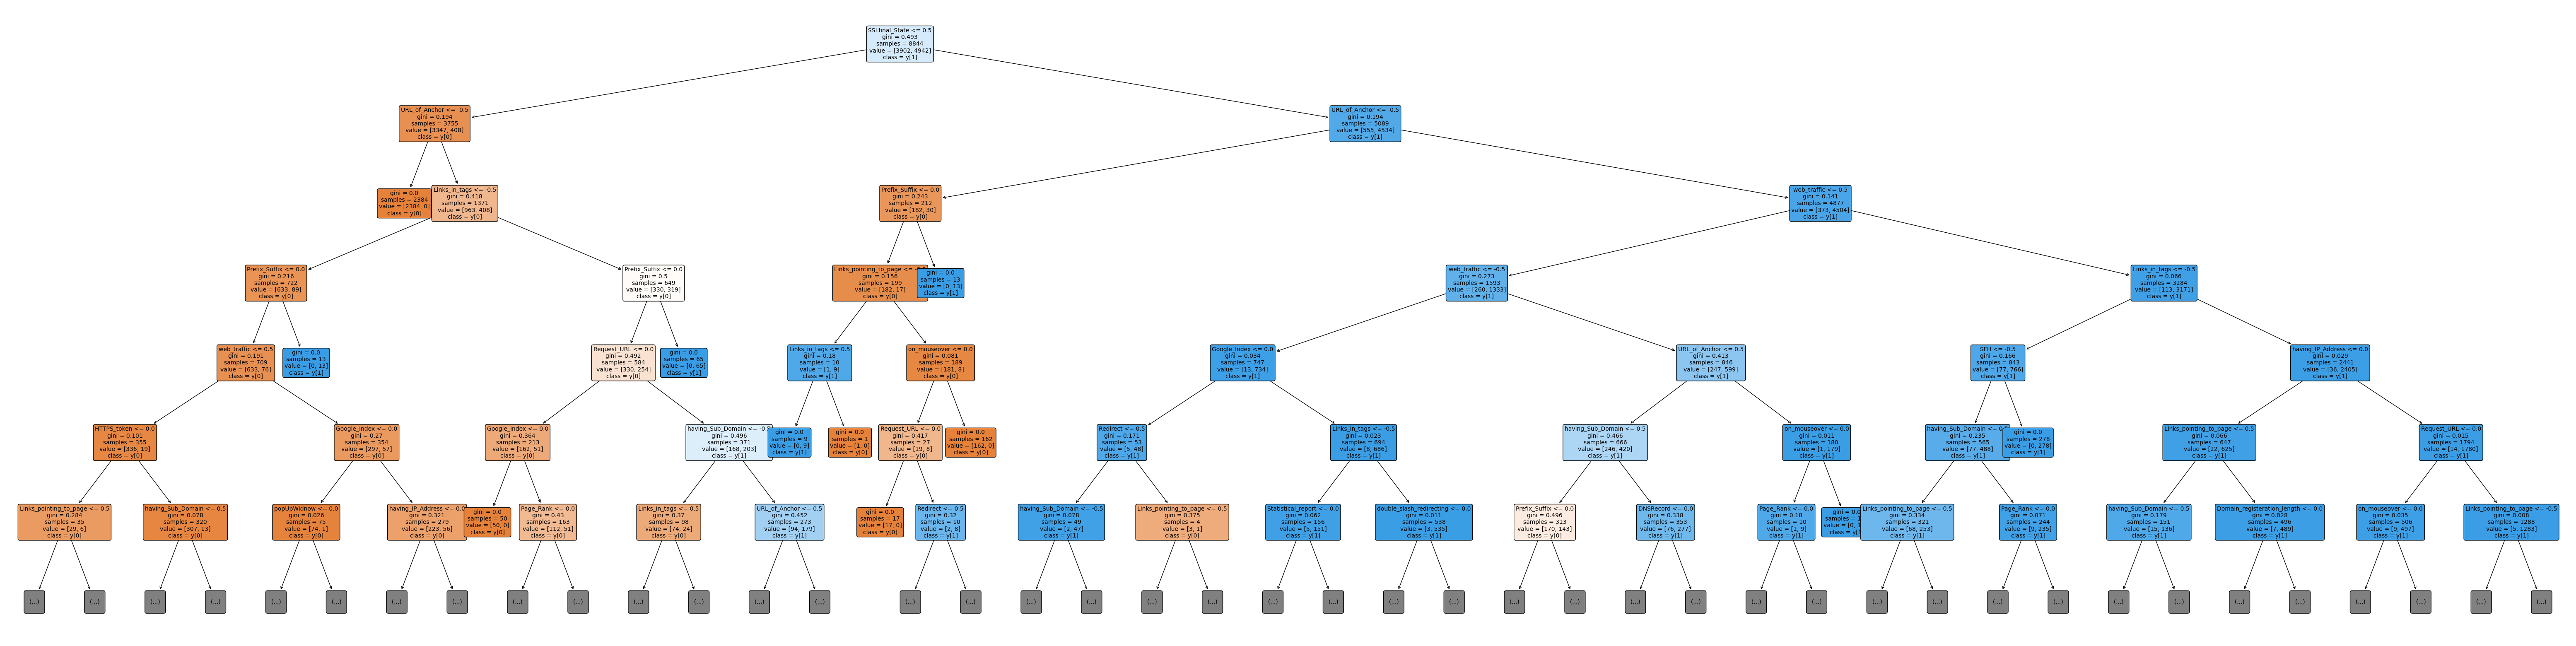

In [93]:
plt.figure(figsize=(80, 20))
plot_tree(decision_tree, max_depth=6, filled=True, feature_names=X.columns, class_names=True, rounded=True, fontsize=10)
plt.show()

#### Determine Feature Importances

In [94]:
importances = decision_tree.feature_importances_
pd.DataFrame(importances, X.columns).sort_values(by=0, ascending=False)

,0
SSLfinal_State,0.626292
URL_of_Anchor,0.109558
Links_in_tags,0.034795
web_traffic,0.029856
having_Sub_Domain,0.027126
Prefix_Suffix,0.023636
Links_pointing_to_page,0.022595
Request_URL,0.016784
age_of_domain,0.012514
having_IP_Address,0.011415


This result supports our initial data exploration correlation matrix, where it was found that SSLfinal_State had the highest correlation with phishing status, followed by URL_of_Anchor.

While the initial accuracy and precision of 0.96 for the decision tree is already quite good, can we improve it by performing tuning and training more complex models? Let's start out by performing pruning on the baseline decision tree.

#### Pruning

In [116]:
path = decision_tree.cost_complexity_pruning_path(X_dev, y_dev)
ccp_alphas = path.ccp_alphas
best_ccp_alpha = 0
best_recall = 0
best_precision = 0

for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_dev, y_dev)
    predictions = pruned_tree.predict(X_dev)
    recall = recall_score(y_dev, predictions)
    precision = precision_score(y_dev, predictions)
    
    if recall >= best_recall and precision >= best_precision:
        best_recall = recall
        best_precision = precision
        best_ccp_alpha = ccp_alpha

best_tree = DecisionTreeClassifier(random_state=1, ccp_alpha = best_ccp_alpha)
best_tree.fit(X_dev, y_dev)

pruned_Y_development_pred = best_tree.predict(X_dev) # predict on development
pruned_Y_test_pred = best_tree.predict(X_test) # predict on test

for label in set(y_dev):
    if label not in pruned_Y_development_pred:
        print(f"No predicted samples for class {label} in the development set.")

for label in set(y_test):
    if label not in pruned_Y_test_pred:
        print(f"No predicted samples for class {label} in the test set.")

print("Train Set Summary for Pruned Decision Tree:")
print(classification_report(y_dev, pruned_Y_development_pred))

print("Test Set Summary for Pruned Decision Tree:")
print(classification_report(y_test, pruned_Y_test_pred))

Train Set Summary for Pruned Decision Tree:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3902
           1       0.99      0.99      0.99      4942

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844

Test Set Summary for Pruned Decision Tree:
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       996
           1       0.97      0.96      0.97      1215

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



The pruned tree performance is about the same as the baseline decision tree. Let's try random forests to see if we can prevent overfitting.

### Random Forest

#### Initialize and Train Model

In [120]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_dev, y_dev)
rf_pred = rf.predict(X_dev)

In [121]:
y_dev_pred = rf.predict(X_dev) # predict on development
y_test_pred = rf.predict(X_test) # predict on test

In [122]:
print("Train Set Summary for Decision Tree:")
print(classification_report(y_dev, y_dev_pred))

print("Test Set Summary for Decision Tree:")
print(classification_report(y_test, y_test_pred))

Train Set Summary for Decision Tree:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3902
           1       0.99      0.99      0.99      4942

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844

Test Set Summary for Decision Tree:
              precision    recall  f1-score   support

          -1       0.98      0.97      0.97       996
           1       0.97      0.98      0.98      1215

    accuracy                           0.98      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.98      0.98      0.98      2211



In [117]:
param_grid = {
    'max_depth': [None, 1, 2, 10],
    'max_features': [None, 1, 2],
    'n_estimators': [1, 10, 50, 100, 500]
}

rand = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rand, param_grid, cv=5, scoring='recall')
grid_search.fit(X_dev, y_dev)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 1, 'max_features': 1, 'n_estimators': 50}


In [119]:
optimal_rf = RandomForestClassifier(max_depth = 1, max_features = 1, n_estimators = 50, random_state = 1)
optimal_rf.fit(X_dev, y_dev)
optimal_rf_pred = optimal_rf.predict(X_test)

print(classification_report(y_test, optimal_rf_pred))


              precision    recall  f1-score   support

          -1       1.00      0.13      0.23       996
           1       0.58      1.00      0.74      1215

    accuracy                           0.61      2211
   macro avg       0.79      0.57      0.49      2211
weighted avg       0.77      0.61      0.51      2211



It seems like we were able to optimize recall, but the other metrics have gone down significantly. Can we improve recall without driving down all other metrics so drastically? Let's try optimizing for F1-score instead.

In [127]:
param_grid = {
    'max_depth': [None, 1, 2, 10, 50],
    'max_features': [None, 1, 2, 5, 10],
    'n_estimators': [1, 10, 50, 100, 500]
}

rand = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rand, param_grid, cv=5, scoring='f1')
grid_search.fit(X_dev, y_dev)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'max_features': 5, 'n_estimators': 50}


In [128]:
optimal_rf = RandomForestClassifier(max_depth = None, max_features = 5, n_estimators = 50, random_state = 1)
optimal_rf.fit(X_dev, y_dev)
optimal_rf_pred = optimal_rf.predict(X_test)

print(classification_report(y_test, optimal_rf_pred))


              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       996
           1       0.97      0.98      0.97      1215

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [129]:
importances = optimal_rf.feature_importances_
pd.DataFrame(importances, X.columns).sort_values(by=0, ascending=False)

,0
SSLfinal_State,0.334047
URL_of_Anchor,0.212272
web_traffic,0.083015
having_Sub_Domain,0.067586
Prefix_Suffix,0.047689
Links_in_tags,0.042420
Request_URL,0.022846
Links_pointing_to_page,0.019796
SFH,0.018612
age_of_domain,0.016393


Notably, the top two most important features in the baseline decision tree have remained the same for the random forest: SSLfinal_State	and URL_of_Anchor.